In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [88]:
df = pd.read_csv('brexit.csv')
df.head()

,"Question: In hindsight, do you think Britain was right or wrong to vote to leave the EU?",Unnamed: 1,Unnamed: 2
0,Source: NatCen Social Research,NaN,NaN
1,NaN,NaN,NaN
2,Date,% responding right,% responding wrong
3,02/08/16,46,42
4,09/08/16,45,44


In [89]:
df = df.drop(df.index[:2])
df.reset_index(drop=True, inplace=True)
df.head()

,"Question: In hindsight, do you think Britain was right or wrong to vote to leave the EU?",Unnamed: 1,Unnamed: 2
0,Date,% responding right,% responding wrong
1,02/08/16,46,42
2,09/08/16,45,44
3,17/08/16,46,43
4,23/08/16,45,43


In [90]:
df.columns = df.iloc[0]
df.drop(0, inplace=True)
df.reset_index(drop=True, inplace=True)
df.head()

,Date,% responding right,% responding wrong
0,02/08/16,46,42
1,09/08/16,45,44
2,17/08/16,46,43
3,23/08/16,45,43
4,31/08/16,47,44


In [91]:
df.dtypes

0
Date                  object
% responding right    object
% responding wrong    object
dtype: object

In [92]:
df['Date'] = pd.to_datetime(df['Date'])
df.dtypes

0
Date                  datetime64[ns]
% responding right            object
% responding wrong            object
dtype: object

In [93]:
df.set_index('Date', inplace=True)

In [94]:
df.index

DatetimeIndex(['2016-02-08', '2016-09-08', '2016-08-17', '2016-08-23',
               '2016-08-31', '2016-09-14', '2016-12-10', '2016-10-20',
               '2016-11-15', '2016-11-29', '2016-05-12', '2016-12-19',
               '2017-04-01', '2017-10-01', '2017-01-18', '2017-01-31',
               '2017-02-13', '2017-02-22', '2017-02-28', '2017-03-14',
               '2017-03-15', '2017-03-21', '2017-03-27', '2017-06-04',
               '2017-04-13', '2017-04-19', '2017-04-21', '2017-04-26',
               '2017-03-05', '2017-10-05', '2017-05-14', '2017-05-17',
               '2017-05-25', '2017-05-31', '2017-07-06', '2017-06-13',
               '2017-06-22', '2017-11-07', '2017-07-19', '2017-01-08',
               '2017-08-22', '2017-08-31', '2017-09-24', '2017-11-10',
               '2017-10-19', '2017-10-20', '2017-10-24', '2017-08-11',
               '2017-05-12', '2017-11-12', '2017-12-20', '2018-08-01',
               '2018-01-17', '2018-01-29', '2018-06-02', '2018-02-13',
      

In [95]:
df = df.sort_index(ascending=True)
df.index

DatetimeIndex(['2016-02-08', '2016-05-12', '2016-08-17', '2016-08-23',
               '2016-08-31', '2016-09-08', '2016-09-14', '2016-10-20',
               '2016-11-15', '2016-11-29', '2016-12-10', '2016-12-19',
               '2017-01-08', '2017-01-18', '2017-01-31', '2017-02-13',
               '2017-02-22', '2017-02-28', '2017-03-05', '2017-03-14',
               '2017-03-15', '2017-03-21', '2017-03-27', '2017-04-01',
               '2017-04-13', '2017-04-19', '2017-04-21', '2017-04-26',
               '2017-05-12', '2017-05-14', '2017-05-17', '2017-05-25',
               '2017-05-31', '2017-06-04', '2017-06-13', '2017-06-22',
               '2017-07-06', '2017-07-19', '2017-08-11', '2017-08-22',
               '2017-08-31', '2017-09-24', '2017-10-01', '2017-10-05',
               '2017-10-19', '2017-10-20', '2017-10-24', '2017-11-07',
               '2017-11-10', '2017-11-12', '2017-12-20', '2018-01-05',
               '2018-01-17', '2018-01-29', '2018-02-13', '2018-02-20',
      

In [96]:
df.columns

Index(['% responding right', '% responding wrong'], dtype='object', name=0)

In [103]:
df['% responding right'] = df['% responding right'].astype(int)
df['% responding wrong'] = df['% responding wrong'].astype(int)

In [105]:
df.dtypes

0
% responding right    int32
% responding wrong    int32
dtype: object

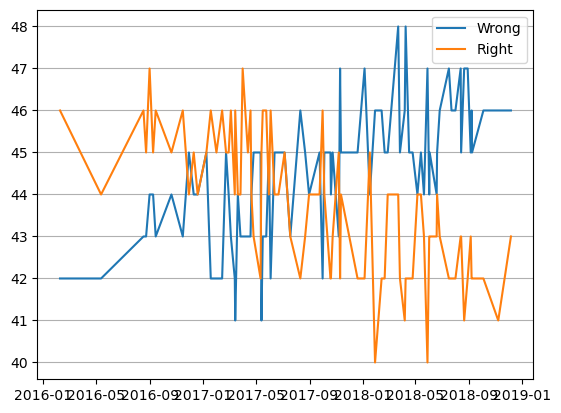

In [107]:
fig, ax = plt.subplots()
ax.plot(df.index, df['% responding wrong'], label = 'Wrong')
ax.plot(df.index, df['% responding right'], label='Right')
ax.legend()
ax.grid(axis='y')

plt.show()


In [98]:
df.head()

,% responding right,% responding wrong
Date,,
2016-02-08,46,42
2016-05-12,44,42
2016-08-17,46,43
2016-08-23,45,43
2016-08-31,47,44


In [102]:
df.dtypes

0
% responding right    object
% responding wrong    object
dtype: object